# Week 4: Mini Project

This notebook will guide you through smaller portions of your final project. For this notebook, we will be using the Abalone dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Abalone) (originating from the Marine Research Laboratories – Taroona). This dataset should already be in your folder (under `abalone.csv`) or you can download it at the above link. 

![Abalone](./abalone.jpg)

### A Brief History of Abalones

An abalone is a sea snail belonging to one of a range of 30 to 130 species (depending on which scientist you ask). It is commonly prized for its mother-of-pearl shell, pearls, and delicious flesh by a variety of cultures and has long been a valuable source of food in its native environments. Sadly, wild populations of abalone have been overfished and poached to the point where commercial farming supplies most of abalone flesh nowadays. It now sits on the list of current animals threatened by extinction.

Source: https://en.wikipedia.org/wiki/Abalone

---

## Part 1: Familiarize Yourself With the Dataset

The purpose of this dataset is to predict the age of an abalone through physical characteristics, determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Good thing it's already been done for us!

Below is the dataset description from the UCI Machine Learning Repository. 

|Name	|	Data Type|	Measure	|Description|
|	----	|	---------|	-----	|-----------|
|	Sex		|nominal		|	|M, F, and I (infant)|
|	Length	|	continuous	|mm|	Longest shell measurement|
|	Diameter	|continuous|	mm	|perpendicular to length|
|	Height	|	continuous	|mm	|with meat in shell|
|	Whole weight|	continuous	|grams	|whole abalone|
|	Shucked weight	|continuous|	grams	|weight of meat|
|	Viscera weight	|continuous|	grams	|gut weight (after bleeding)|
|	Shell weight	|continuous|	grams	|after being dried|
|	Rings	|	integer		|	|+1.5 gives the age in years|

Run the cells below to examine the dataset. 

In [0]:
# Load Abalone dataset
# Remember to change the file location if needed
import csv
f = open("./abalone.csv")
all_lines = csv.reader(f, delimiter = ',')

# We define a header ourselves since the dataset contains only the raw numbers.
dataset = []
header = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 
          'Shell Weight', 'Rings']
for line in all_lines:
    d = dict(zip(header, line))
    d['Length'] = float(d['Length'])
    d['Diameter'] = float(d['Diameter'])
    d['Height'] = float(d['Height'])
    d['Whole Weight'] = float(d['Whole Weight'])
    d['Shucked Weight'] = float(d['Shucked Weight'])
    d['Viscera Weight'] = float(d['Viscera Weight'])
    d['Shell Weight'] = float(d['Shell Weight'])
    d['Rings'] = int(d['Rings'])
    dataset.append(d)

In [0]:
# See first line of dataset
dataset[0]

{'Diameter': 0.365,
 'Height': 0.095,
 'Length': 0.455,
 'Rings': 15,
 'Sex': 'M',
 'Shell Weight': 0.15,
 'Shucked Weight': 0.2245,
 'Viscera Weight': 0.101,
 'Whole Weight': 0.514}

---

## Part 2: Simple Statistics

This dataset is already cleaned for us and relatively straightforward, without strings or time data. In your final project, you will have to take care of missing or tricky values yourself. 

Fill in the following cells with the requested information about the dataset. The answers are given so you can check the output of your own code. For floating numbers, don't worry too much about the exact numbers as long as they are quite close -- different systems may have different rounding protocols. 

Feel free to `import numpy` if you want more practice with it, or just use Python's native structures to play around with the numbers.

In [0]:
# Q: What is the total number of entries in the dataset?
# A: 4177
len(dataset)

4177

In [0]:
# Q: What is the average length of an abalone?
# A: 0.5239920995930099 or 0.524
tot_length=[d['Length'] for d in dataset]
sum1=0.0
for k in range(len(tot_length)):
  sum1=sum1+tot_length[k]
avg=sum1/len(tot_length)
avg

0.5239920995930099

In [0]:
# Q: What is the widest abalone in the dataset (diameter)?
# A: 0.65
wide_data=sorted([d['Diameter'] for d in dataset])
wide_data[-1]

0.65

In [0]:
# Q: What is the average number of rings of smaller abalones compared to that of larger abalones? That 
#    is, do smaller abalones tend to be younger or older than larger abalones? 
#    We will count small abalones as abalones with lengths less than or equal to the average length of 
#    an abalone. The average length of an abalone is 0.524. 
# A: Small Abalones have on average 8.315645514223196 rings.
#    Large Abalones have on average 11.192848020434228 rings.
large_rings=[d['Rings'] for d in dataset if d['Length']>0.524]
small_rings=[d['Rings'] for d in dataset if d['Length']<=0.524]
sum1=0.0
for k in range(len(small_rings)):
  sum1=sum1+small_rings[k]
ageSmall=sum1/len(small_rings)
sum1=0.0
for k in range(len(large_rings)):
  sum1=sum1+large_rings[k]
ageLarge=sum1/len(large_rings)
# Change variable name if necessary
print('Small Abalones have on average', ageSmall, 'rings.')
print('Large Abalones have on average', ageLarge, 'rings.')

Small Abalones have on average 8.315645514223196 rings.
Large Abalones have on average 11.192848020434228 rings.


---

## Part 3: Data Visualizations

In this course, we learned about [Matplotlib](https://matplotlib.org), a "Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms". There are a [variety of plots and figures](https://matplotlib.org/gallery/index.html) we can make with Matplotlib, and in conjunction with NumPy, becomes a powerful and versatile tool in your skillset.

In lectures, we covered the basics of line plots, histograms, scatter plots, bar plots, and box plots. Let's try out a few below. 

In [0]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy
from collections import defaultdict

### Line Plots

Line plots show the change in data over time. The example Line Plot below plots the change in density as abalones age (i.e. the distribution of rings). **Note that a line plot is not necessarily the best way to show this data since it doesn't deal with a trend!** Use a histogram (next step) to better showcase this data.

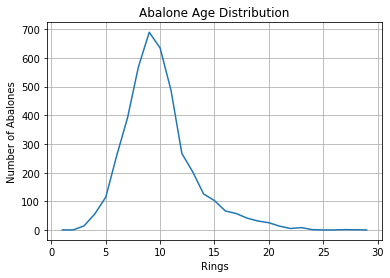

In [0]:
# Parse out Rings column from dataset
rings = [d['Rings'] for d in dataset]
rings.sort()

# Count number of abalones with each number of rings with defaultdict
abalone_rings = defaultdict(int)
for r in rings:
    abalone_rings[r] += 1
X = list(abalone_rings.keys())
Y = list(abalone_rings.values())

# Customize plot
plt.gca().set(xlabel='Rings', ylabel='Number of Abalones',
       title='Abalone Age Distribution')
plt.grid()

# Show the plot of Rings vs Number of Abalones
plt.plot(X, Y)

### Histograms

Histograms show the distribution of numeric continuous variables with central tendency and skewness. **Using the line plot data from above, plot a histogram showing the distribution of abalone age.** Feel free to explore [matplotlib](https://matplotlib.org/gallery/index.html) on your own to customize your histogram and the following visualizations.

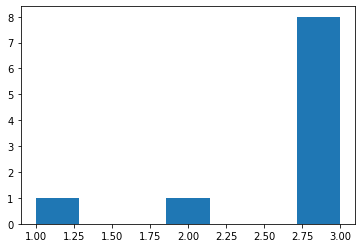

In [0]:
# Complete this cell with a histogram of abalone age distribution

# Flatten distribution list into frequency distribution
age_freq = []
for key in abalone_rings.keys():
    for i in range(0, abalone_rings.get(key)):
        age_freq.append(key)
k=age_freq[:10]
# Plot your histogram here
plt.hist(k,bins=7)
plt.show()

### Scatter Plots

Scatter plots show the strength of a relationship between two variables (also known as correlations). From *Part 2: Simple Statistics*, we see that larger abalones tend to be larger, at least from a numbers perspective. **Let's see if this is actually true by creating a scatter plot showing the relationship between `Rings` and `Length`.** 

*On Your Own:* Read up on `sciPy` and how you can calculate and graph the correlation as well.

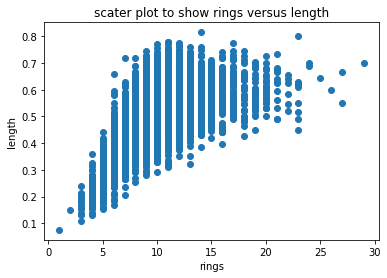

In [0]:
# Complete this cell with a scatter plot of age vs length
rings = [d['Rings'] for d in dataset]
length = [d['Length'] for d in dataset]
plt.scatter(rings,length)
plt.xlabel("rings")
plt.ylabel("length")
plt.title("scater plot to show rings versus length")
plt.show()


### Bar Plots

Bar plots are great for comparing categorical variables. There are a few subtypes of bar plots, such as the grouped bar chart or stacked bar chart. Since we have the `Sex` field to play with, we can compare data across `M` and `F` abalones. Below is a simple stacked bar chart comparing the `Sex` category with the `Shucked Weight` data. **Create a bar chart of your choice of data.** 

You may refer to the cell below to parse out fields by sex.

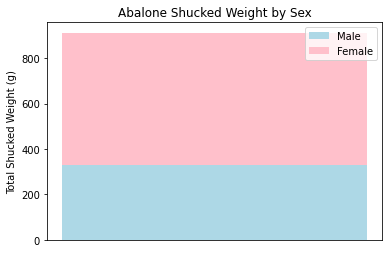

In [0]:
# Example Stacked Bar Chart - Comparisons Between Sexes
Mweight_sh = sum([d['Shucked Weight'] for d in dataset if d['Sex'] is 'M'])
Fweight_sh = sum([d['Shucked Weight'] for d in dataset if d['Sex'] is 'F'])
index = [1]
p1 = plt.bar(index, Mweight_sh, color='lightblue')
p2 = plt.bar(index, Fweight_sh, bottom=Mweight, color='pink')
plt.gca().set(title='Abalone Shucked Weight by Sex', ylabel='Total Shucked Weight (g)');
plt.xticks([])
plt.legend((p1[0], p2[0]), ('Male', 'Female'))
plt.show()

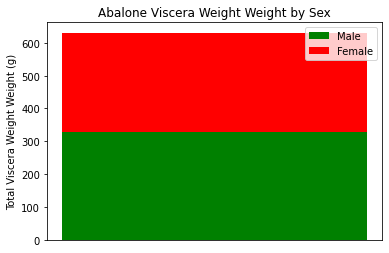

329.3519999999997

In [0]:
# Complete this cell with your choice of data
# Example Stacked Bar Chart - Comparisons Between Sexes
Mweight_vis = sum([d['Viscera Weight'] for d in dataset if d['Sex'] is 'M'])
Fweight_vis = sum([d['Viscera Weight'] for d in dataset if d['Sex'] is 'F'])
index = [1]
p1 = plt.bar(index, Mweight_vis, color='green')
p2 = plt.bar(index, Fweight_vis, bottom=Mweight, color='red')
plt.gca().set(title='Abalone Viscera Weight Weight by Sex', ylabel='Total Viscera Weight Weight (g)');
plt.xticks([])
plt.legend((p1[0], p2[0]), ('Male', 'Female'))
plt.show()

### Box Plots

Box plots are useful for comparing distributions of data and are commonly found in research papers. The box portion of a box plot represents 50% of the data, and there are versions where you can mark outliers and other extremes. We have the distribution of rings already from the line plot example under the variable name `age_freq`, assuming you haven't modified it. **Find the distribution of another field of your choice and create one or more box plots with both of these fields.**

*Hint: You can plot multiple box plots with the command `plt.boxplot([plot1, plot2, ..., plotn])` or use `subplots()` to draw multiple separate plots at the same time. See [this matplotlib example](https://matplotlib.org/gallery/statistics/boxplot_demo.html#sphx-glr-gallery-statistics-boxplot-demo-py) for more.*

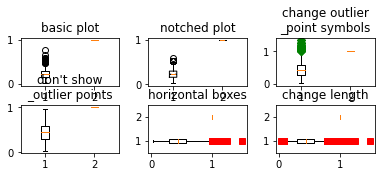

In [0]:
# Complete this cell with multiple box plots
Mweight_vis = [d['Viscera Weight'] for d in dataset if d['Sex'] is 'M']
Fweight_vis = [d['Viscera Weight'] for d in dataset if d['Sex'] is 'F']
Mweight_sh = [d['Shucked Weight'] for d in dataset if d['Sex'] is 'M']
Fweight_sh = [d['Shucked Weight'] for d in dataset if d['Sex'] is 'F']
fig, axs = plt.subplots(2, 3)
# basic plot
data=(Mweight_vis,index)
axs[0, 0].boxplot(data)
axs[0, 0].set_title('basic plot')
# notched plot
data=(Fweight_vis,index)
axs[0, 1].boxplot(data, 1)
axs[0, 1].set_title('notched plot')

# change outlier point symbols
data=(Mweight_sh,index)
axs[0, 2].boxplot(data, 0, 'gD')
axs[0, 2].set_title('change outlier\n_point symbols')

# don't show outlier points
data=(Fweight_sh,index)
axs[1, 0].boxplot(data, 0, '')
axs[1, 0].set_title("don't show\n_outlier points")

# horizontal boxes
axs[1, 1].boxplot(data, 0, 'rs', 0)
axs[1, 1].set_title('horizontal boxes')

# change whisker length
axs[1, 2].boxplot(data, 0, 'rs', 0, 0.75)
axs[1, 2].set_title('change length')

fig.subplots_adjust(left=0.08, right=0.9, bottom=0.5, top=0.9,
                    hspace=0.4, wspace=0.3)

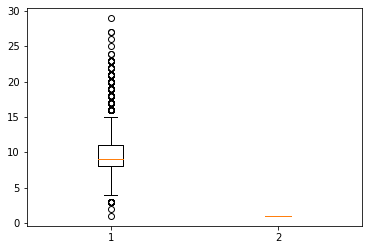

In [0]:
d2=[d['Rings'] for d in dataset]
data = [d2,index]
plt.boxplot(data)
plt.show()

## All Done!

In this notebook, we covered loading a dataset, simple statistics, basic data visualizations, and web-scraping to round out your toolset. These will be immensely helpful as you move forwards in building your skills in data science.

By now, you hopefully feel a little more confident with tackling your final project. It is up to you to find your own data, build your own notebook, and show others what you have achieved. Best of luck!

In [1]:
!jupyter nbconvert Mini_Project_solution.ipynb

[NbConvertApp] Converting notebook Mini_Project_solution.ipynb to html
[NbConvertApp] Writing 408187 bytes to Mini_Project_solution.html
